In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
# Importar librerías necesarias
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df = pd.read_csv("compras_completo_limpio.csv", low_memory=False)
df

,identificador,nombre,href,agencia,area,provincia,comunidad_autonoma,coordenadas,tipo_de_casa,planta,...,cuarto_de_bicicletas,calle_alumbrada,alcantarillado,instalaciones_deportivas,proximidad_a_la_playa,en_construccion,gastroteca,certificado_energetico,aerotermia,vidrios_dobles
0,50854370399_100500,Chalet en calle del Romeral,https://www.pisos.com/comprar/chalet-serracine...,GAVILAN INMOBILIARIA,Serracines (Fresno de Torote),Madrid,Comunidad De Madrid,"40.6209617, -3.3982133",Chalet,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar
1,51718033874_100200,Piso en Chorrillo,https://www.pisos.com/comprar/piso-chorrillo28...,"ESTUDIO ALCALA CIUDADELA, S.L.U.",Chorrillo (Distrito Chorrillo-Garena. Alcalá d...,Madrid,Comunidad De Madrid,"40.492167453, -3.378074786",Piso,3,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar
2,51761671345_100200,Piso en Espartales,https://www.pisos.com/comprar/piso-espartales2...,Estudio Alcala Espartales Sl,Espartales (Distrito Ensanche-Espartales. Alca...,Madrid,Comunidad De Madrid,"40.509316211, -3.365592767",Piso,2,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar
3,51725794774_100500,Casa en Valdecelada,https://www.pisos.com/comprar/casa-mejorada_de...,VILSA GRUPO INMOBILIARIO,Mejorada del Campo,Madrid,Comunidad De Madrid,"40.410538474, -3.442883158",Casa,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar
4,50901469775_100200,Piso en Valleaguado-La Cañada,https://www.pisos.com/comprar/piso-valleaguado...,"ESTUDIO CAÑADA_VALLEAGUADO, S.L.",Valleaguado-La Cañada (Coslada),Madrid,Comunidad De Madrid,"40.426886, -3.539399",Piso,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,"E, E",Sin especificar,Sin especificar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,48377805198_100500,Piso en calle -,https://www.pisos.com/comprar/piso-melilla_cen...,Urbana Consulting Grupo XXI,Melilla,Melilla,Melilla,"35.2698901, -2.9376105",Piso,7,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar
192209,48365028654_100500,Piso en calle -,https://www.pisos.com/comprar/piso-melilla_cen...,Urbana Consulting Grupo XXI,Melilla,Melilla,Melilla,"35.2733204, -2.9374412",Piso,7,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar
192210,48410053866_100500,Piso en calle -,https://www.pisos.com/comprar/piso-melilla_cen...,Urbana Consulting Grupo XXI,Melilla,Melilla,Melilla,"35.2922264, -2.9441677",Piso,6,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar
192211,50077625976_109800,"Piso en calle de la Azucena, 6",https://www.pisos.com/comprar/piso-melilla_cen...,Agencia no disponible,Melilla,Melilla,Melilla,"35.273193, -2.9407787",Piso,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar


In [17]:
df["antiguedad"] = df["antiguedad"].replace("Sin especificar", "10-20")

In [19]:
df["garaje"].unique()

array(['Sin especificar', 'Si', 'No'], dtype=object)

In [21]:
df["aire_acondicionado"].unique()

array(['Sin especificar', 'Si', 'No'], dtype=object)

In [23]:
df["conservacion"] = df["conservacion"].replace("Sin especificar", "En buen estado")

In [25]:
df["conservacion"].unique()

array(['En buen estado', 'Reformado', 'A estrenar', 'A reformar'],
      dtype=object)

In [27]:
df["aire_acondicionado"].unique()

array(['Sin especificar', 'Si', 'No'], dtype=object)

In [29]:
nan_counts = df.isna().sum()
nan_counts
#df["provincia"].unique()


identificador             0
nombre                    0
href                      0
agencia                   0
area                      0
                         ..
en_construccion           0
gastroteca                0
certificado_energetico    0
aerotermia                0
vidrios_dobles            0
Length: 64, dtype: int64

In [32]:
df["latitud"] = df["coordenadas"].str.split(",").str[0].str.strip().astype(float, errors='ignore')
df["longitud"] = df["coordenadas"].str.split(",").str[1].str.strip().astype(float, errors='ignore')

In [33]:
columnas_clustering = ["precio", "antiguedad", "conservacion", "latitud", "longitud", "piscina", "baños","habitaciones","superficie","superficie_util","aire_acondicionado", "provincia","planta","orientacion"]

In [36]:
df = df.drop_duplicates(subset="identificador")
df

,identificador,nombre,href,agencia,area,provincia,comunidad_autonoma,coordenadas,tipo_de_casa,planta,...,alcantarillado,instalaciones_deportivas,proximidad_a_la_playa,en_construccion,gastroteca,certificado_energetico,aerotermia,vidrios_dobles,latitud,longitud
0,50854370399_100500,Chalet en calle del Romeral,https://www.pisos.com/comprar/chalet-serracine...,GAVILAN INMOBILIARIA,Serracines (Fresno de Torote),Madrid,Comunidad De Madrid,"40.6209617, -3.3982133",Chalet,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,40.620962,-3.398213
1,51718033874_100200,Piso en Chorrillo,https://www.pisos.com/comprar/piso-chorrillo28...,"ESTUDIO ALCALA CIUDADELA, S.L.U.",Chorrillo (Distrito Chorrillo-Garena. Alcalá d...,Madrid,Comunidad De Madrid,"40.492167453, -3.378074786",Piso,3,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,40.492167,-3.378075
2,51761671345_100200,Piso en Espartales,https://www.pisos.com/comprar/piso-espartales2...,Estudio Alcala Espartales Sl,Espartales (Distrito Ensanche-Espartales. Alca...,Madrid,Comunidad De Madrid,"40.509316211, -3.365592767",Piso,2,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,40.509316,-3.365593
3,51725794774_100500,Casa en Valdecelada,https://www.pisos.com/comprar/casa-mejorada_de...,VILSA GRUPO INMOBILIARIO,Mejorada del Campo,Madrid,Comunidad De Madrid,"40.410538474, -3.442883158",Casa,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,40.410538,-3.442883
4,50901469775_100200,Piso en Valleaguado-La Cañada,https://www.pisos.com/comprar/piso-valleaguado...,"ESTUDIO CAÑADA_VALLEAGUADO, S.L.",Valleaguado-La Cañada (Coslada),Madrid,Comunidad De Madrid,"40.426886, -3.539399",Piso,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,"E, E",Sin especificar,Sin especificar,40.426886,-3.539399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,48377805198_100500,Piso en calle -,https://www.pisos.com/comprar/piso-melilla_cen...,Urbana Consulting Grupo XXI,Melilla,Melilla,Melilla,"35.2698901, -2.9376105",Piso,7,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,35.269890,-2.937610
192209,48365028654_100500,Piso en calle -,https://www.pisos.com/comprar/piso-melilla_cen...,Urbana Consulting Grupo XXI,Melilla,Melilla,Melilla,"35.2733204, -2.9374412",Piso,7,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,35.273320,-2.937441
192210,48410053866_100500,Piso en calle -,https://www.pisos.com/comprar/piso-melilla_cen...,Urbana Consulting Grupo XXI,Melilla,Melilla,Melilla,"35.2922264, -2.9441677",Piso,6,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,35.292226,-2.944168
192211,50077625976_109800,"Piso en calle de la Azucena, 6",https://www.pisos.com/comprar/piso-melilla_cen...,Agencia no disponible,Melilla,Melilla,Melilla,"35.273193, -2.9407787",Piso,0,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,En trámite,Sin especificar,Sin especificar,35.273193,-2.940779


In [38]:
df2 = df[columnas_clustering].copy()
df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,20-30,En buen estado,40.620962,-3.398213,Si,3,4,176.0,176.0,Sin especificar,Madrid,0,Sin especificar
1,310000.0,30-50,Reformado,40.492167,-3.378075,Sin especificar,2,3,123.0,123.0,Si,Madrid,3,Sin especificar
2,255000.0,20-30,En buen estado,40.509316,-3.365593,Si,2,3,131.0,131.0,Sin especificar,Madrid,2,Sin especificar
3,335000.0,20-30,En buen estado,40.410538,-3.442883,Si,4,5,180.0,160.0,Si,Madrid,0,Noroeste
4,270000.0,30-50,En buen estado,40.426886,-3.539399,Sin especificar,2,3,105.0,105.0,Sin especificar,Madrid,0,Sin especificar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,10-20,En buen estado,35.269890,-2.937610,Si,2,4,119.0,119.0,Sin especificar,Melilla,7,Sin especificar
192209,175000.0,10-20,En buen estado,35.273320,-2.937441,Si,1,2,75.0,75.0,Sin especificar,Melilla,7,Sin especificar
192210,190000.0,10-20,En buen estado,35.292226,-2.944168,Sin especificar,2,2,80.0,80.0,Si,Melilla,6,Sin especificar
192211,195000.0,20-30,En buen estado,35.273193,-2.940779,Si,2,3,140.0,90.0,Si,Melilla,0,Sin especificar


In [41]:
df2 = df2.dropna(subset=['precio'])

In [43]:
df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,20-30,En buen estado,40.620962,-3.398213,Si,3,4,176.0,176.0,Sin especificar,Madrid,0,Sin especificar
1,310000.0,30-50,Reformado,40.492167,-3.378075,Sin especificar,2,3,123.0,123.0,Si,Madrid,3,Sin especificar
2,255000.0,20-30,En buen estado,40.509316,-3.365593,Si,2,3,131.0,131.0,Sin especificar,Madrid,2,Sin especificar
3,335000.0,20-30,En buen estado,40.410538,-3.442883,Si,4,5,180.0,160.0,Si,Madrid,0,Noroeste
4,270000.0,30-50,En buen estado,40.426886,-3.539399,Sin especificar,2,3,105.0,105.0,Sin especificar,Madrid,0,Sin especificar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,10-20,En buen estado,35.269890,-2.937610,Si,2,4,119.0,119.0,Sin especificar,Melilla,7,Sin especificar
192209,175000.0,10-20,En buen estado,35.273320,-2.937441,Si,1,2,75.0,75.0,Sin especificar,Melilla,7,Sin especificar
192210,190000.0,10-20,En buen estado,35.292226,-2.944168,Sin especificar,2,2,80.0,80.0,Si,Melilla,6,Sin especificar
192211,195000.0,20-30,En buen estado,35.273193,-2.940779,Si,2,3,140.0,90.0,Si,Melilla,0,Sin especificar


In [45]:
df2["antiguedad"].unique()

array(['20-30', '30-50', '10-20', '> 50', '< 5', '5-10'], dtype=object)

In [48]:
df2["orientacion"].unique()

array(['Sin especificar', 'Noroeste', 'Sur', 'Oeste', 'Este', 'Norte',
       'Sureste', 'Suroeste', 'Noreste'], dtype=object)

In [50]:
df2["orientacion"].unique()
label_encoder = LabelEncoder()
df2['orientacion'] = label_encoder.fit_transform(df2['orientacion'])

In [52]:
#df["garaje"].unique()
#label_encoder = LabelEncoder()
#df2['garaje'] = label_encoder.fit_transform(df2['garaje'])

In [54]:
df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,20-30,En buen estado,40.620962,-3.398213,Si,3,4,176.0,176.0,Sin especificar,Madrid,0,5
1,310000.0,30-50,Reformado,40.492167,-3.378075,Sin especificar,2,3,123.0,123.0,Si,Madrid,3,5
2,255000.0,20-30,En buen estado,40.509316,-3.365593,Si,2,3,131.0,131.0,Sin especificar,Madrid,2,5
3,335000.0,20-30,En buen estado,40.410538,-3.442883,Si,4,5,180.0,160.0,Si,Madrid,0,2
4,270000.0,30-50,En buen estado,40.426886,-3.539399,Sin especificar,2,3,105.0,105.0,Sin especificar,Madrid,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,10-20,En buen estado,35.269890,-2.937610,Si,2,4,119.0,119.0,Sin especificar,Melilla,7,5
192209,175000.0,10-20,En buen estado,35.273320,-2.937441,Si,1,2,75.0,75.0,Sin especificar,Melilla,7,5
192210,190000.0,10-20,En buen estado,35.292226,-2.944168,Sin especificar,2,2,80.0,80.0,Si,Melilla,6,5
192211,195000.0,20-30,En buen estado,35.273193,-2.940779,Si,2,3,140.0,90.0,Si,Melilla,0,5


In [56]:
label_encoder = LabelEncoder()
df2['antiguedad'] = label_encoder.fit_transform(df2['antiguedad'])


df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,1,En buen estado,40.620962,-3.398213,Si,3,4,176.0,176.0,Sin especificar,Madrid,0,5
1,310000.0,2,Reformado,40.492167,-3.378075,Sin especificar,2,3,123.0,123.0,Si,Madrid,3,5
2,255000.0,1,En buen estado,40.509316,-3.365593,Si,2,3,131.0,131.0,Sin especificar,Madrid,2,5
3,335000.0,1,En buen estado,40.410538,-3.442883,Si,4,5,180.0,160.0,Si,Madrid,0,2
4,270000.0,2,En buen estado,40.426886,-3.539399,Sin especificar,2,3,105.0,105.0,Sin especificar,Madrid,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,0,En buen estado,35.269890,-2.937610,Si,2,4,119.0,119.0,Sin especificar,Melilla,7,5
192209,175000.0,0,En buen estado,35.273320,-2.937441,Si,1,2,75.0,75.0,Sin especificar,Melilla,7,5
192210,190000.0,0,En buen estado,35.292226,-2.944168,Sin especificar,2,2,80.0,80.0,Si,Melilla,6,5
192211,195000.0,1,En buen estado,35.273193,-2.940779,Si,2,3,140.0,90.0,Si,Melilla,0,5


In [58]:
label_encoder = LabelEncoder()
df2['provincia'] = label_encoder.fit_transform(df2['provincia'])
df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,1,En buen estado,40.620962,-3.398213,Si,3,4,176.0,176.0,Sin especificar,32,0,5
1,310000.0,2,Reformado,40.492167,-3.378075,Sin especificar,2,3,123.0,123.0,Si,32,3,5
2,255000.0,1,En buen estado,40.509316,-3.365593,Si,2,3,131.0,131.0,Sin especificar,32,2,5
3,335000.0,1,En buen estado,40.410538,-3.442883,Si,4,5,180.0,160.0,Si,32,0,2
4,270000.0,2,En buen estado,40.426886,-3.539399,Sin especificar,2,3,105.0,105.0,Sin especificar,32,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,0,En buen estado,35.269890,-2.937610,Si,2,4,119.0,119.0,Sin especificar,34,7,5
192209,175000.0,0,En buen estado,35.273320,-2.937441,Si,1,2,75.0,75.0,Sin especificar,34,7,5
192210,190000.0,0,En buen estado,35.292226,-2.944168,Sin especificar,2,2,80.0,80.0,Si,34,6,5
192211,195000.0,1,En buen estado,35.273193,-2.940779,Si,2,3,140.0,90.0,Si,34,0,5


In [60]:
nan_counts = df2.isna().sum()
nan_counts
df2["planta"].unique()

array([ 0,  3,  2,  1,  4,  6,  5, -1,  7,  8,  9, 10, 17, 12, 11, 16, 15,
       13, 14, 21, 20, 19, 18], dtype=int64)

In [62]:
label_encoder = LabelEncoder()
df2['conservacion'] = label_encoder.fit_transform(df2['conservacion'])
df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,1,2,40.620962,-3.398213,Si,3,4,176.0,176.0,Sin especificar,32,0,5
1,310000.0,2,3,40.492167,-3.378075,Sin especificar,2,3,123.0,123.0,Si,32,3,5
2,255000.0,1,2,40.509316,-3.365593,Si,2,3,131.0,131.0,Sin especificar,32,2,5
3,335000.0,1,2,40.410538,-3.442883,Si,4,5,180.0,160.0,Si,32,0,2
4,270000.0,2,2,40.426886,-3.539399,Sin especificar,2,3,105.0,105.0,Sin especificar,32,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,0,2,35.269890,-2.937610,Si,2,4,119.0,119.0,Sin especificar,34,7,5
192209,175000.0,0,2,35.273320,-2.937441,Si,1,2,75.0,75.0,Sin especificar,34,7,5
192210,190000.0,0,2,35.292226,-2.944168,Sin especificar,2,2,80.0,80.0,Si,34,6,5
192211,195000.0,1,2,35.273193,-2.940779,Si,2,3,140.0,90.0,Si,34,0,5


In [65]:
nan_counts = df2.isna().sum()
nan_counts


precio                0
antiguedad            0
conservacion          0
latitud               0
longitud              0
piscina               0
baños                 0
habitaciones          0
superficie            0
superficie_util       0
aire_acondicionado    0
provincia             0
planta                0
orientacion           0
dtype: int64

In [67]:
label_encoder = LabelEncoder()
df2['aire_acondicionado'] = label_encoder.fit_transform(df2['aire_acondicionado'])
df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,1,2,40.620962,-3.398213,Si,3,4,176.0,176.0,2,32,0,5
1,310000.0,2,3,40.492167,-3.378075,Sin especificar,2,3,123.0,123.0,1,32,3,5
2,255000.0,1,2,40.509316,-3.365593,Si,2,3,131.0,131.0,2,32,2,5
3,335000.0,1,2,40.410538,-3.442883,Si,4,5,180.0,160.0,1,32,0,2
4,270000.0,2,2,40.426886,-3.539399,Sin especificar,2,3,105.0,105.0,2,32,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,0,2,35.269890,-2.937610,Si,2,4,119.0,119.0,2,34,7,5
192209,175000.0,0,2,35.273320,-2.937441,Si,1,2,75.0,75.0,2,34,7,5
192210,190000.0,0,2,35.292226,-2.944168,Sin especificar,2,2,80.0,80.0,1,34,6,5
192211,195000.0,1,2,35.273193,-2.940779,Si,2,3,140.0,90.0,1,34,0,5


In [69]:
label_encoder = LabelEncoder()
df2['piscina'] = label_encoder.fit_transform(df2['piscina'])
df2

,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,1,2,40.620962,-3.398213,1,3,4,176.0,176.0,2,32,0,5
1,310000.0,2,3,40.492167,-3.378075,2,2,3,123.0,123.0,1,32,3,5
2,255000.0,1,2,40.509316,-3.365593,1,2,3,131.0,131.0,2,32,2,5
3,335000.0,1,2,40.410538,-3.442883,1,4,5,180.0,160.0,1,32,0,2
4,270000.0,2,2,40.426886,-3.539399,2,2,3,105.0,105.0,2,32,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,0,2,35.269890,-2.937610,1,2,4,119.0,119.0,2,34,7,5
192209,175000.0,0,2,35.273320,-2.937441,1,1,2,75.0,75.0,2,34,7,5
192210,190000.0,0,2,35.292226,-2.944168,2,2,2,80.0,80.0,1,34,6,5
192211,195000.0,1,2,35.273193,-2.940779,1,2,3,140.0,90.0,1,34,0,5


In [71]:
label_encoder = LabelEncoder()
df2['planta'] = label_encoder.fit_transform(df2['planta'])
df2["planta"].unique()

array([ 1,  4,  3,  2,  5,  7,  6,  0,  8,  9, 10, 11, 18, 13, 12, 17, 16,
       14, 15, 22, 21, 20, 19], dtype=int64)

In [73]:
df["planta"].unique()

array([ 0,  3,  2,  1,  4,  6,  5, -1,  7,  8,  9, 10, 17, 12, 11, 16, 15,
       13, 14, 21, 20, 19, 18], dtype=int64)

In [75]:
df2 = df2.dropna()
df2


,precio,antiguedad,conservacion,latitud,longitud,piscina,baños,habitaciones,superficie,superficie_util,aire_acondicionado,provincia,planta,orientacion
0,364900.0,1,2,40.620962,-3.398213,1,3,4,176.0,176.0,2,32,1,5
1,310000.0,2,3,40.492167,-3.378075,2,2,3,123.0,123.0,1,32,4,5
2,255000.0,1,2,40.509316,-3.365593,1,2,3,131.0,131.0,2,32,3,5
3,335000.0,1,2,40.410538,-3.442883,1,4,5,180.0,160.0,1,32,1,2
4,270000.0,2,2,40.426886,-3.539399,2,2,3,105.0,105.0,2,32,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192208,270000.0,0,2,35.269890,-2.937610,1,2,4,119.0,119.0,2,34,8,5
192209,175000.0,0,2,35.273320,-2.937441,1,1,2,75.0,75.0,2,34,8,5
192210,190000.0,0,2,35.292226,-2.944168,2,2,2,80.0,80.0,1,34,7,5
192211,195000.0,1,2,35.273193,-2.940779,1,2,3,140.0,90.0,1,34,1,5


In [ ]:
df2["superficie"] = df2["superficie"] / 1000  # Ajusta según la unidad real
df2["superficie_util"] = df2["superficie_util"] / 1000
df2["latitud"] = (df2["latitud"] - df2["latitud"].mean()) / df2["latitud"].std()
df2["longitud"] = (df2["longitud"] - df2["longitud"].mean()) / df2["longitud"].std()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X= df2.drop(columns=["precio"])  # Variables predictoras (incluye "Cluster")
y = df2["precio"]  # Variable objetivo (precio de la vivienda

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
print("X_train mean:", X_train.mean(), "std:", X_train.std())
print("X_test mean:", X_test.mean(), "std:", X_test.std())
print("y_train mean:", y_train.mean(), "std:", y_train.std())
print("y_test mean:", y_test.mean(), "std:", y_test.std())


print(X_train.shape, X_test.shape)

In [ ]:




model2 = keras.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    layers.Dense(32),
    LeakyReLU(alpha=0.1),
    layers.Dense(1)  # Capa de salida
])
# Compilar el modelo
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model2.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

# Evaluar el modelo
test_loss, test_mae = model2.evaluate(X_test, y_test, verbose=1)
print(f"Error absoluto medio en test: {test_mae:.4f}")

# Hacer predicciones
y_pred = np.expm1(model2.predict(X_test))
# Graficar predicciones vs valores reales
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Realidad")
plt.show()


In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
y_pred =(model2.predict(X_test))

# Graficar predicciones vs valores reales
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Realidad")
plt.show()


In [ ]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

print(X_train2.shape, X_test2.shape)

In [ ]:

python -c "import tensorflow as tf; print(tf.__version__)"

columnas_clustering 

In [ ]:
df2.columns

In [ ]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

In [ ]:
print("Media de Y_train:", np.mean(y_train))
print("Desviación estándar de Y_train:", np.std(y_train))
print("Mínimo y máximo de Y_train:", np.min(y_train), np.max(y_train))

In [ ]:

# Preparar los datos
X = df2.drop(columns=["precio"])  # Variables predictoras
y = df2["precio"]  # Variable objetivo

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las variables de entrada con MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalizar la variable objetivo con StandardScaler
scaler_y = StandardScaler()
y_train = np.log1p(y_train.to_numpy().reshape(-1, 1))  # Aplicar log1p para estabilizar
y_test = np.log1p(y_test.to_numpy().reshape(-1, 1))

(153770, 13) (38443, 13)
Epoch 1/200


C:\Users\kikeg\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4806/4806 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 18.1713 - mae: 2.5250 - val_loss: 0.7273 - val_mae: 0.6167
Epoch 2/200
4806/4806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.6314 - mae: 0.6046 - val_loss: 0.7221 - val_mae: 0.5582
Epoch 3/200
4806/4806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.5238 - mae: 0.5545 - val_loss: 0.7630 - val_mae: 0.5377
Epoch 4/200
4806/4806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4896 - mae: 0.5355 - val_loss: 0.7898 - val_mae: 0.5298
Epoch 5/200
4806/4806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4821 - mae: 0.5316 - val_loss: 0.8184 - val_mae: 0.5278
Epoch 6/200
4806/4806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4755 - mae: 0.5296 - val_loss: 0.8994 - val_mae: 0.5227
Epoch 7/200
4806/4806 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4692 - mae: 0.5268 - val_loss: 0.9156 - val_mae: 0.5230
Epoch 8/200
4806/4806 ━━━━━━━━━━━━━━━━━━━━ 5s 988us/step - loss: 0.4651 - mae: 0.5239 - val_loss: 0.9156 - val_mae: 0.5232
Epoch 9/200
4806/4806 ━━━━━━━━━━━━━━━━━━━

C:\Users\kikeg\AppData\Local\Temp\ipykernel_22544\845867550.py:50: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(model2.predict(X_test))  # Convertir de vuelta a la escala original


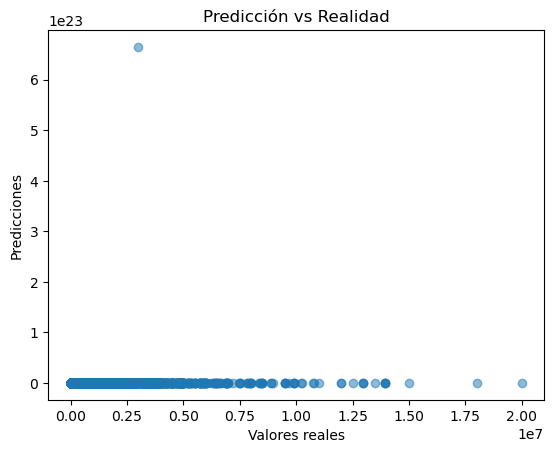

In [77]:
# Preparar los datos
X = df2.drop(columns=["precio"])  # Variables predictoras
y = df2["precio"]  # Variable objetivo

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las variables de entrada con MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalizar la variable objetivo con StandardScaler
scaler_y = StandardScaler()
y_train = np.log1p(y_train.to_numpy().reshape(-1, 1))  # Aplicar log1p para estabilizar
y_test = np.log1p(y_test.to_numpy().reshape(-1, 1))

print(X_train.shape, X_test.shape)
model2 = keras.Sequential([
    layers.Dense(128, input_shape=(X_train.shape[1],)),  # Más neuronas en la primera capa
    LeakyReLU(),  # Activación LeakyReLU

    layers.Dense(64),  # Segunda capa oculta
    LeakyReLU(),

    layers.Dense(32),  # Tercera capa oculta
    LeakyReLU(),

    layers.Dense(16),  # Cuarta capa oculta
    LeakyReLU(),

    layers.Dense(1)  # Capa de salida para regresión
])


# Compilar el modelo con Adam y learning rate reducido
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Implementar EarlyStopping para detener el entrenamiento si la validación deja de mejorar
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Entrenar el modelo
history = model2.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Evaluar el modelo
test_loss, test_mae = model2.evaluate(X_test, y_test, verbose=1)
print(f"Error absoluto medio en test: {test_mae:.4f}")

# Hacer predicciones y desnormalizar
y_pred = np.expm1(model2.predict(X_test))  # Convertir de vuelta a la escala original

# Graficar predicciones vs valores reales
plt.scatter(np.expm1(y_test), y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Realidad")
plt.show()

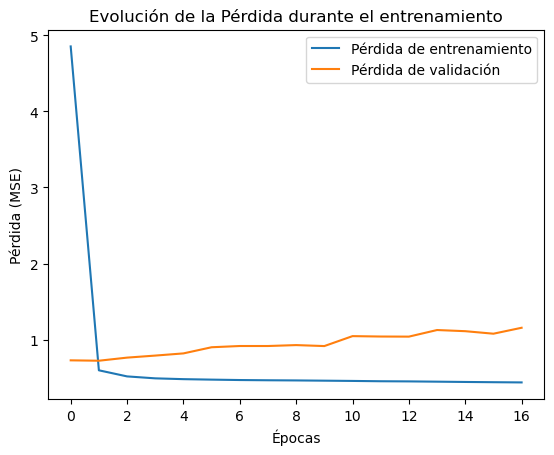

In [79]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Evolución de la Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()